# Setting & Import

In [1]:
import time
import sys
import os

# 현재 파일(main.ipynb)이 있는 디렉토리의 부모 디렉토리를 sys.path에 추가
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
# INFO 
from gameInfo import *
from hyperParams import *
from setDevice import *

# CODES
from state.ver1 import *
from network.resnet import *
from trainer.ver1 import *
from eval.ver1 import *
from selfplay.ver1 import *
from tester.nnVsHuman import *

In [3]:
fname = 'Jpub'
path = '/Users/ijimin/Documents/GitHub/AiGO/Omok/Jimin/model'

## Check

In [4]:
print(f"Using device: {device}")

Using device: mps


In [5]:
def convert_seconds(seconds):
    hours = seconds // 3600  # 1시간 = 3600초
    minutes = (seconds % 3600) // 60  # 남은 초에서 60으로 나눈 몫이 분
    remaining_seconds = seconds % 60  # 나머지가 초

    return int(hours), int(minutes), int(remaining_seconds)

## Train

In [6]:
start = time.time()
previous_time = start

# model 정의
model = Network(N_RESIDUAL_BLOCK, N_KERNEL, STATE_SHAPE, N_ACTIONS)
model = model.to(device)

self_play = SelfPlay(model, SP_TEMPERATURE, TEMP_DISCOUNT, SP_GAME_COUNT, PV_EVALUATE_COUNT)
train = TrainNetwork(model, BATCH_SIZE, LEARNING_RATE, LEARN_DECAY, LEARN_EPOCH)
eval_network = EvalNetwork(model, EVAL_GAME_COUNT, EVAL_TEMPERATURE, PV_EVALUATE_COUNT, path, fname)

# 학습
for i in range(EPOCHS):
    print(f'\nTrain {i+1} --------------------------------')
    self_play()
    train(self_play.history, i)
    eval_network(train.model)

    if eval_network.updated:
        self_play.update_model(train.model)

    eval_network.save_model()

    h, m, s = convert_seconds(time.time() - previous_time)
    previous_time = time.time() 
    print(f"-- {i+1}번째 epoch 학습에 걸린 시간은, {h}시간 {m}분 {s}초 입니다. \n")

seconds = time.time() - start
h, m, s = convert_seconds(seconds)
print(f"학습에 걸린 시간은, {h}시간 {m}분 {s}초 입니다. ")


Train 1 --------------------------------
self play 50 / 500
self play 100 / 500
self play 150 / 500
self play 200 / 500
self play 250 / 500
self play 300 / 500
self play 350 / 500
self play 400 / 500
self play 450 / 500
self play 500 / 500
Average Point of Latest Model 0.45
0번째 epoch 학습에 걸린 시간은, 0시간 16분 26초 입니다. 


Train 2 --------------------------------
self play 50 / 500
self play 100 / 500
self play 150 / 500
self play 200 / 500
self play 250 / 500
self play 300 / 500
self play 350 / 500
self play 400 / 500
self play 450 / 500
self play 500 / 500
Average Point of Latest Model 0.3
1번째 epoch 학습에 걸린 시간은, 0시간 15분 35초 입니다. 


Train 3 --------------------------------
self play 50 / 500
self play 100 / 500
self play 150 / 500
self play 200 / 500
self play 250 / 500
self play 300 / 500
self play 350 / 500
self play 400 / 500
self play 450 / 500
self play 500 / 500
Average Point of Latest Model 0.6
Best Model is Updated.
2번째 epoch 학습에 걸린 시간은, 0시간 15분 35초 입니다. 


Train 4 -------------------

**학습 지표가 될 수 있는 것**  
1. 사람과 직접 플레이했을 때의 승률  
2. MCTS 노드 방문 횟수  
3. 결과 분포(이긴거 진거 비긴거) -- eval에서 시각화로   
4. history를 Queue로 저장해 확인할 수 있게 만들기  
5. 

**eval에서 필요한 것** 
1. '순수' 모델만 가지고 정책에 따라 움직이는 것 - 기본은 MCTS를 이용하는게 맞지만, 모델의 성능 확인 용    
2. 에이전트가 이겼을 때 게임이 끝나지 않는 오류 수정  
3. 게임의 결과를 알려주는 코드 생성  

In [7]:
# download hyper params 
with open(f"{path}/{fname}/hyperParams.txt", "w", encoding="utf-8") as file:
    file.write(hyper_params)

## Visualize

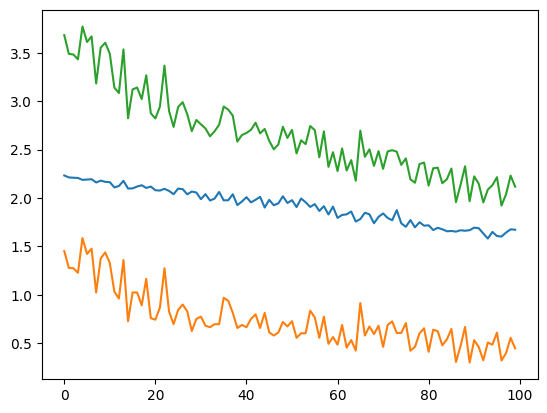

In [8]:
plt.plot(train.losses)
plt.savefig(f"{path}/{fname}/loss.png", dpi=300, bbox_inches='tight')
plt.show()

- 시각화 방향성 : 각 항목이 뭔지 나와야 함  
- 제목 달기 

In [9]:
model = Network(N_RESIDUAL_BLOCK, N_KERNEL, STATE_SHAPE, N_ACTIONS)
params = torch.load("/Users/ijimin/Documents/GitHub/AiGO/Omok/Jimin/model/Jpub/best_model_weight.pth", weights_only=False)
model.load_state_dict(params)

<All keys matched successfully>

,0,1,2
0,,,
1,,,
2,,,


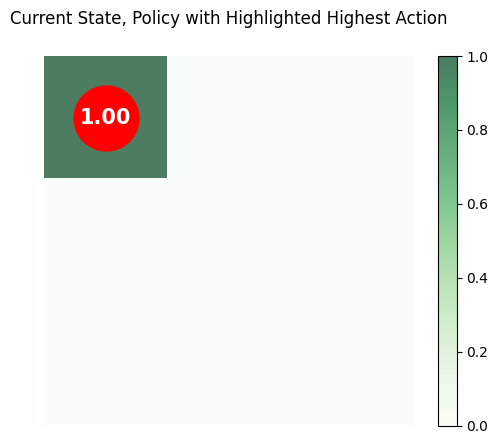

Alpha Zero's Action is : 0


,0,1,2
0,O,,
1,,,
2,,,


,0,1,2
0,O,,
1,,,
2,,,X


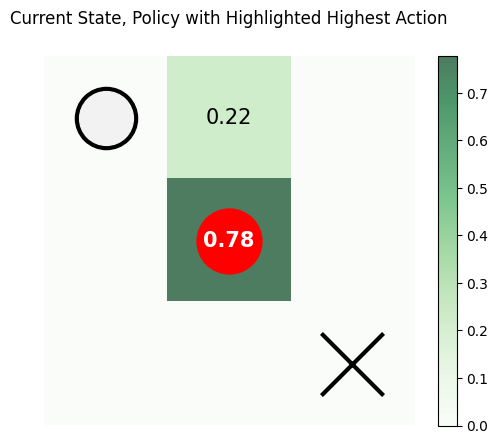

Alpha Zero's Action is : 4


,0,1,2
0,O,,
1,,O,
2,,,X


,0,1,2
0,O,,
1,,O,
2,X,,X


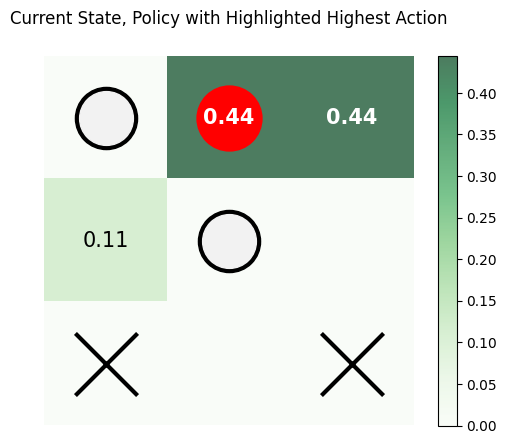

Alpha Zero's Action is : 1


,0,1,2
0,O,O,
1,,O,
2,X,,X


,0,1,2
0,O,O,
1,,O,
2,X,X,X


In [11]:
# vs_human = ModelvsHuman(eval_network.best_model)

vs_human = ModelvsHuman(model)
vs_human()